# RandomForestRegressor Grid Search CV

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%run -i ./Model_Eval.ipynb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
training_data = pd.read_csv('../Datasets/training_data_full.csv').sample(frac=1)

In [3]:
# import from Model_Eval.ipynb
numerical_features = get_numerical_features(training_data)

X = training_data[numerical_features]
Y = training_data['DIABETES_3Y_Change_Percentage']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [4]:
parameters = {
    'max_depth': [1, 5, 20, 50, 100],
    'n_estimators': [100, 500, 1000, 1500],
    'max_features': ['sqrt', 'log2', 1, 3, 5, 10]
}

In [5]:
rf = RandomForestRegressor(random_state = 42)

In [8]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    cv=5,
    n_jobs=16,
    verbose=0
)

In [10]:
grid_search.fit(X, Y)

In [8]:
best_params = grid_search.best_params_
best_params

{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 1000}

# Get Cross Val R2 scores

In [11]:
rf = RandomForestRegressor(
    # hyper parameters
    max_depth=100,
    max_features='sqrt',
    n_estimators=1000,
    # train params
    n_jobs=16,
    verbose=0
)

r2_scores = cross_val_score(rf, X, Y, cv=5, scoring='r2')

In [12]:
np.mean(r2_scores)

0.2418130318836674

In [15]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=1000,
                      n_jobs=16)

In [16]:
feature_importance_list = list(zip(numerical_features, rf.feature_importances_))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)
top_features = feature_importance_list[0:10]

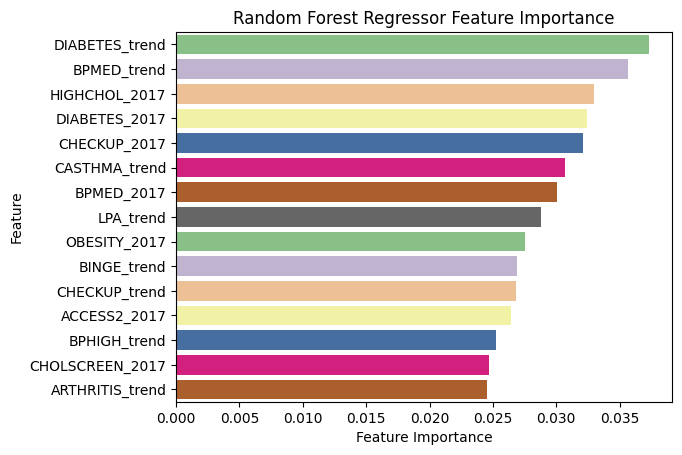

In [17]:
plot_feature_importance(rf.feature_importances_, numerical_features, 'Random Forest Regressor', 15)